<a href="https://colab.research.google.com/github/tinafanfan/My-Python/blob/main/My_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[https://colab.research.google.com/drive/1QjevIZ1CD4S4ss3et2n9eVAmqayW9Isf#scrollTo=-IrwUpxnWuen](https://colab.research.google.com/drive/1QjevIZ1CD4S4ss3et2n9eVAmqayW9Isf#scrollTo=-IrwUpxnWuen)

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt


# Read and Save object

.csv <-> df
1.   Read a csv file as a dataframe
2.   Read multiple csv files with same columns (dim = [r1, c] and [r2, c]) and concat them as a dataframe (dim = [r1+r2, c]).



In [ ]:
# Read
df = pd.read_csv('XXX.csv')
df = pd.concat([pd.read_csv('file_name_1.csv'), pd.read_csv('file_name_2.csv')], axis=0)

# Write
df.to_csv('filename.csv')

df <-> .pkl(pickle file)

In [ ]:
df.to_pickle('file_name.pkl')
pd.read_pickle('file_name.pkl')

# Object transformation

series <-> df

In [ ]:
s = pd.Series(["a", "b", "c"], name="vals")
s.to_frame()

,vals
0,a
1,b
2,c


list <-> torch.Tensor <-> numpy 三者互換

In [ ]:
list = [1,2,3]
tensor = torch.tensor([0, 1])
ndarray = np.array([1,2,3])

# list to torch.Tensor
tensor=torch.Tensor(list)
# list to numpy
ndarray = np.array(list)

# torch.Tensor to numpy
ndarray = tensor.numpy()
# torch.Tensor to list
list = tensor.numpy().tolist() # 先转 numpy，后转 list

# numpy to torch.Tensor
tensor = torch.from_numpy(ndarray)
# numpy to list
list = ndarray.tolist()

# Time

Convert a column of a dataframe to datetime using [pandas.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [ ]:
# df['col_name'] = pd.to_datetime(df['col_name'], format='%m/%d/%Y %I:%M:%S %p')

根據 datetime 欄位，選擇特定時間區段的 dataframe 資料 (rows)。Select data for a specific time range based on the datetime column from a dataframe

In [ ]:
# df[(df['col_name'] >= '2006-02-06 00:00:00')&(df['col_name'] <= '2023-09-23 23:00:00')]


# EDA

## 重複值

In [ ]:
# 確認整個 df 重複的情況
df.duplicated()
# 確認特定 col 有多少重複值
duplicates = df[df.duplicated(subset=['col1', 'col2'])]
print(duplicates.shape)

In [ ]:
# 處理：刪除列。當 Date 重複的資料都是2筆，其中 Values 為一個正常值一個0的狀況，刪掉重複中都為0的rows。
# 使用 .index 指定列，和 drop 刪除
load_drop = df.drop(df[(df['Date'].isin(duplicates['Date'])) & (df['value']==0)].index)

## 類別 explore

根據類別欄位，將數值欄位畫成 boxplot

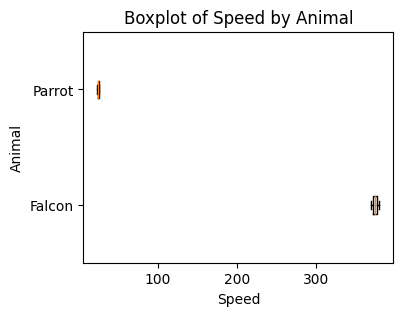

In [ ]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Speed': [380., 370., 24., 26.]})
ls = []

# 遍歷每個類別，將相應的Load數據添加到列表中
for zone, data in df.groupby('Animal')['Speed']:
    ls.append(data)

# 繪製箱形圖
plt.figure(figsize=(4, 3))
plt.boxplot(ls, labels=df['Animal'].unique(), vert=False)
plt.xlabel('Speed')
plt.ylabel('Animal')
plt.title('Boxplot of Speed by Animal')
plt.show()

## NA

利用熱圖視覺化 NA 狀況，灰色是 NA ，黑色是有值。plt.imshow 只吃 array-like，所以series or df 都要先轉成 array。

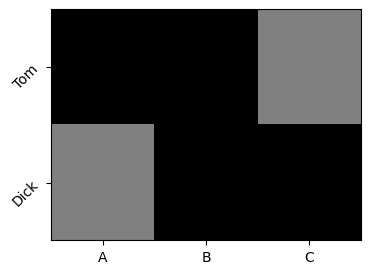

In [ ]:
ser = pd.Series([5, 6, np.nan, np.nan, 3, 4])

NA = ser.isna() # 找出 NA boolean
NA_vec = NA.to_numpy()
heatmap_data = NA_vec.reshape(2, 3) # 將向量重新排列為 required dimension

# set heat map color: 黑色 FALSE，灰色 TRUE (NA)
custom_cmap = plt.matplotlib.colors.ListedColormap(['black', 'gray'])

# heatmap
plt.figure(figsize=(4, 3))
plt.imshow(heatmap_data, cmap=custom_cmap, aspect='auto') # 绘制热图

plt.yticks(np.arange(2), ['Tom', 'Dick'], rotation=45)  # Set text labels.
plt.xticks(np.arange(3), ['A', 'B', 'C'])  # Set text labels.

# plt.yticks([])  # Disable yticks.
# plt.xticks([])  # Disable xticks.

plt.show()

# Basic


## print

In [ ]:
a = 1 + 1
print(f"a={a}")

a=2


## iterator

In [ ]:
# source: https://www.w3schools.com/python/python_iterators.asp

# show usage of iter() and next()
# An iterator is an object that contains a countable number of values.
# Lists, tuples, dictionaries, and sets are all iterable objects. They are iterable containers which you can get an iterator from.
# All these objects have a iter() method which is used to get an iterator.
mytuple = ("apple", "banana", "cherry")
myit = iter(mytuple)
print(next(myit))

# create an iterator
class MyNumbers:
    def __iter__(self):
        self.a = 1
        return self

    def __next__(self):
        x = self.a
        self.a += 2
        return x

myclass = MyNumbers()
myiter = iter(myclass)
print(next(myiter)) # 1
print(next(myiter)) # 3

# create an iterator with StopIteration that avoid unlimit iteration
class MyNumbers:
    def __iter__(self):
        self.a = 1
        return self

    def __next__(self):
        if self.a <= 20:
            x = self.a
            self.a += 1
            return x
    else:
        raise StopIteration

myclass = MyNumbers()
myiter = iter(myclass)

for x in myiter:
    print(x) # 1,2,...,20

## List
List comprehensions are one of Python's most beloved and unique features. The easiest way to understand them is probably to just look at a few examples:


In [ ]:

squares = [n**2 for n in range(10)]
squares

In [ ]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
short_planets = [planet for planet in planets if len(planet) < 6]
short_planets


The "brackets" constructs a new list from an old one, this is called [list comprehension](https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions).

The basic idea with `[f(x) for x in xs if condition]` is:
```python
def list_comprehension(xs):
    result = []
    for x in xs:
        if condition:
            result.append(f(x))
    return result
```
The f(x) can be any expression, containing x or not.

# Numpy


## np.ix_

Construct an open mesh from multiple sequences using the function `np.ix_`.

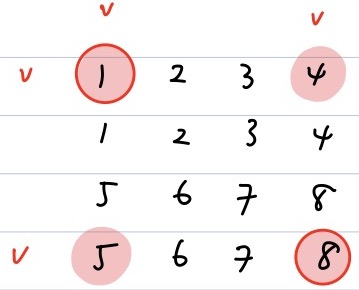

In [ ]:
ind = np.array([0,3])
X = np.array([(1, 2, 3, 4), (1, 2, 3, 4), (5, 6, 7, 8), (5, 6, 7, 8)], dtype = float)
print(X)
print(X[ind, ind]) # diagonal elements - red circle
print(X[np.ix_(ind, ind)]) # a mesh - red highlight color

[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [5. 6. 7. 8.]
 [5. 6. 7. 8.]]
[1. 8.]
[[1. 4.]
 [5. 8.]]


## inverse

In [ ]:
A = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])

# Calculating the inverse of the matrix
print(np.linalg.inv(A))

[[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]


## concatenate

You can use the numpy.concatenate() function to concat, merge, or join a sequence of two or multiple arrays into a single NumPy array.
https://sparkbyexamples.com/numpy/numpy-concatenate-arrays/

In [ ]:
# 1-D
arr = np.array([0, 1, 2])
print(arr)
print(arr.shape)

# 2-D
arr1 = np.array([[3, 4, 5]])
print(arr1)
print(arr1.shape)

# 3-D
arr2 = np.array([[[0,1,2],[3, 4, 5]]])
print(arr2)
print(arr2.shape)

[0 1 2]
(3,)
[[3 4 5]]
(1, 3)
[[[0 1 2]
  [3 4 5]]]
(1, 2, 3)


In [ ]:
con = np.concatenate((arr, arr))
print(con)
print(con.shape)
con = np.concatenate((arr1, arr1))
print(con)
print(con.shape)
con = np.concatenate((arr2, arr2))
print(con)
print(con.shape)

[0 1 2 0 1 2]
(6,)
[[3 4 5]
 [3 4 5]]
(2, 3)
[[[0 1 2]
  [3 4 5]]

 [[0 1 2]
  [3 4 5]]]
(2, 2, 3)


In [ ]:
# concatenate two NumPy arrays column-wise by specifying axis=1
# con = np.concatenate((arr, arr), axis = 1)
# print(con)
# print(con.shape)
con = np.concatenate((arr1, arr1), axis = 1)
print(con)
print(con.shape)
con = np.concatenate((arr2, arr2), axis = 1)
print(con)
print(con.shape)

[[3 4 5 3 4 5]]
(1, 6)
[[[0 1 2]
  [3 4 5]
  [0 1 2]
  [3 4 5]]]
(1, 4, 3)


In [ ]:
con = np.hstack((arr, arr))
print(con)
print(con.shape)
con = np.hstack((arr1, arr1))
print(con)
print(con.shape)
con = np.hstack((arr2, arr2))
print(con)
print(con.shape)

[0 1 2 0 1 2]
(6,)
[[3 4 5 3 4 5]]
(1, 6)
[[[0 1 2]
  [3 4 5]
  [0 1 2]
  [3 4 5]]]
(1, 4, 3)


In [ ]:
con = np.vstack((arr, arr))
print(con)
print(con.shape)
con = np.vstack((arr1, arr1))
print(con)
print(con.shape)
con = np.vstack((arr2, arr2))
print(con)
print(con.shape)

[[0 1 2]
 [0 1 2]]
(2, 3)
[[3 4 5]
 [3 4 5]]
(2, 3)
[[[0 1 2]
  [3 4 5]]

 [[0 1 2]
  [3 4 5]]]
(2, 2, 3)


In [ ]:
con = np.stack((arr, arr))
print(con)
print(con.shape)
con = np.stack((arr1, arr1))
print(con)
print(con.shape)
con = np.stack((arr2, arr2))
print(con)
print(con.shape)

[[0 1 2]
 [0 1 2]]
(2, 3)
[[[3 4 5]]

 [[3 4 5]]]
(2, 1, 3)
[[[[0 1 2]
   [3 4 5]]]


 [[[0 1 2]
   [3 4 5]]]]
(2, 1, 2, 3)


In [ ]:
con = np.dstack((arr, arr)) # Stacking Along Height (depth)
print(con)
print(con.shape)
con = np.dstack((arr1, arr1))
print(con)
print(con.shape)
con = np.dstack((arr2, arr2))
print(con)
print(con.shape)

# Matplotlib

## scatter plot

In [ ]:
import matplotlib.pyplot as plt

([], <a list of 0 Text major ticklabel objects>)

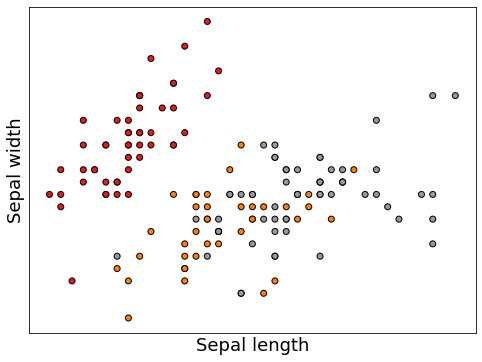

In [ ]:
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

plt.figure(2, figsize=(8, 6))
# num：圖像編碼或者名稱，數字是編碼，字符串是名稱
# figsize：寬和高，單位是英尺
# dpi：指定繪圖對象的分辨率，即每英寸多少個像素，缺省值為80
# facecolor：背景顏色
# edgecolor：邊框顏色
# frameon：是否顯示邊框

plt.clf() # clear the current figure

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length", size=18)
plt.ylabel("Sepal width", size=18)

plt.xticks(())
plt.yticks(())

# plt.title('y')
# plt.colorbar()
# plt.show()

## Line chart

### pd.plot

<Axes: title={'center': 'pandas plot'}>

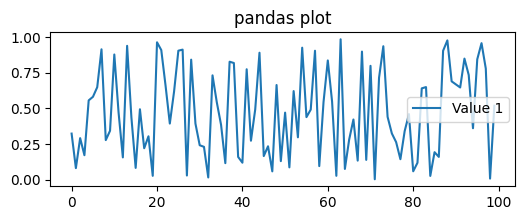

In [24]:
# pandas 的 plot 是使用 matplotlib.pyplot，用法上很簡單，想要快速看一下某個值的走勢可以使用
import pandas as pd

df = pd.DataFrame({'Value 1': np.random.rand(100)})
df.plot(y = 'Value 1', figsize=(6,2), title = 'pandas plot')

### plt.plot()

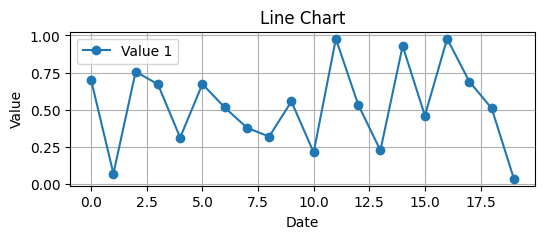

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame
df = pd.DataFrame({'Value 1': np.random.rand(20)})

# Plot a line chart with a legend
plt.figure(figsize=(6, 2))
plt.plot(df['Value 1'], marker='o', linestyle='-', label='Value 1')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Chart')
plt.grid(True)
plt.legend()
plt.show()


### plt.plot() multiple lines

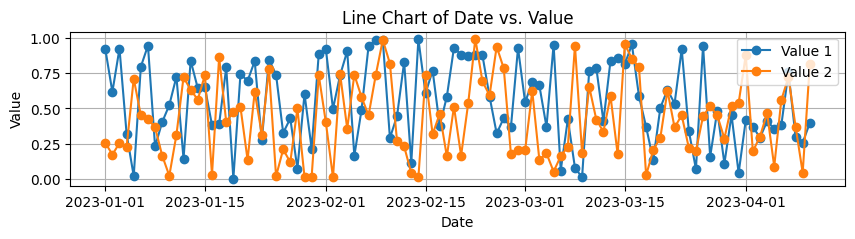

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame
date_rng = pd.date_range(start='2023-01-01', end='2023-04-10', freq='D')
df = pd.DataFrame({'Date': date_rng,
                   'Value 1': np.random.rand(len(date_rng)),
                   'Value 2': np.random.rand(len(date_rng))})

# Plot a line chart with a legend
plt.figure(figsize=(10, 2))
plt.plot(df['Date'], df['Value 1'], marker='o', linestyle='-', label='Value 1')
plt.plot(df['Date'], df['Value 2'], marker='o', linestyle='-', label='Value 2')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Chart of Date vs. Value')
plt.grid(True)
plt.legend()
plt.show()


### plt.subplots() multiple lines

`subplots` return fig:Figureand ax:Axes or array of Axes (圖層和座標). 用於繪製更複雜的圖或多張layout

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

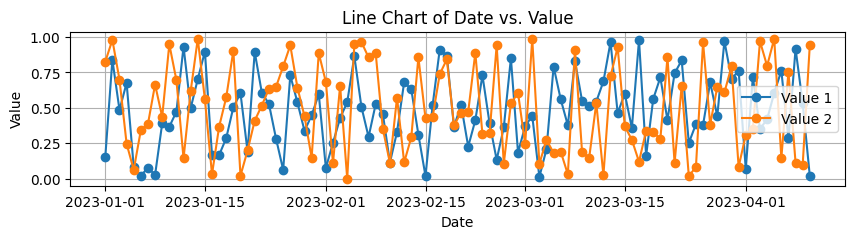

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame
date_rng = pd.date_range(start='2023-01-01', end='2023-04-10', freq='D')
df = pd.DataFrame({'Date': date_rng,
                   'Value 1': np.random.rand(len(date_rng)),
                   'Value 2': np.random.rand(len(date_rng))})


# 创建一个子图并获取ax对象
fig, ax = plt.subplots(figsize=(10, 2))

# 在ax对象上绘制线图，并添加图例
ax.plot(df['Date'], df['Value 1'], marker='o', linestyle='-', label='Value 1')
ax.plot(df['Date'], df['Value 2'], marker='o', linestyle='-', label='Value 2')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Line Chart of Date vs. Value')
ax.grid(True)
ax.legend()

# 显示图形
plt.show()


### plt.subplots() multiple subplots

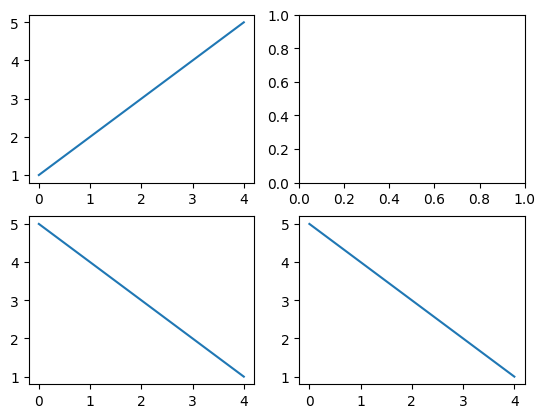

In [43]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [5,4,3,2,1]
fig, ax = plt.subplots(2,2)
ax[0][0].plot(x) # 左上
ax[0][1].plot(x) # 右上
ax[1][1].plot(y) # 左下
ax[1][0].plot(y) # 右下
plt.show()

# Seaborn

這個套件看起來是要用 pandas 的 dataframe

https://seaborn.pydata.org/tutorial/introduction.html


In [ ]:
import seaborn as sns

In [ ]:
# np.array -> pd.dataframe
iris_df = pd.DataFrame(iris.data)
# add a new column to the end of a pandas DataFrame
iris_df = iris_df.assign(target = iris.target)
# add column names to a pd df
iris_df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Labels']
iris_df.columns[0]

'Sepal length'

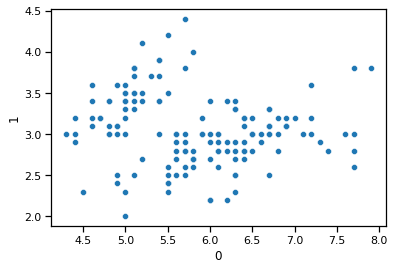

In [ ]:
sns.set_context("notebook")
# sns.scatterplot(x="Sepal length",
#                 y="Sepal width",
#                 data=iris_df)



sns.scatterplot(x = iris_df[iris_df.columns[0]], y = iris_df[iris_df.columns[1]])


We can make scatter plots with Penguin data using Seaborn’s scatterplot() function and  improve the simple version using:

1. increase **the figure size** using plt.figure(figsize=(10,8)) function
2. increase **Axes tick labels** using Seaborn’s set_context() function for all the plots in the notebook
3. increase **the data point size** in the scatter plot using the argument “s” in Seaborn’s scatterplot() function
4. change **the axis labels and their sizes** using xlabel() and ylabel() functions in Matplotlib


Text(0.5, 1.0, 'Iris dataset')

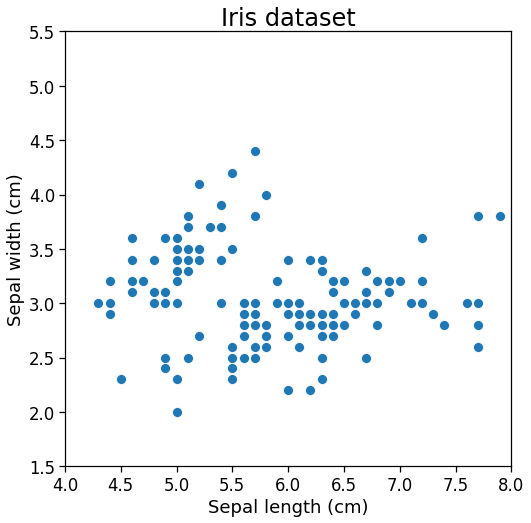

In [ ]:
plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5)
sns.scatterplot(x="Sepal length",
                y="Sepal width",
                data=iris_df,
                s=100)
plt.xlim(4, 8)
plt.ylim(1.5, 5.5)
plt.xlabel("Sepal length (cm)", size=18)
plt.ylabel("Sepal width (cm)", size=18)
plt.title("Iris dataset", fontdict=None, loc='center', size=24)

We can **change the colors of data points** on the scatter plot **by a variable** in the dataframe using “hue” argument in Seaborn’s scatterplot() function.


Text(0, 0.5, 'Sepal width (cm)')

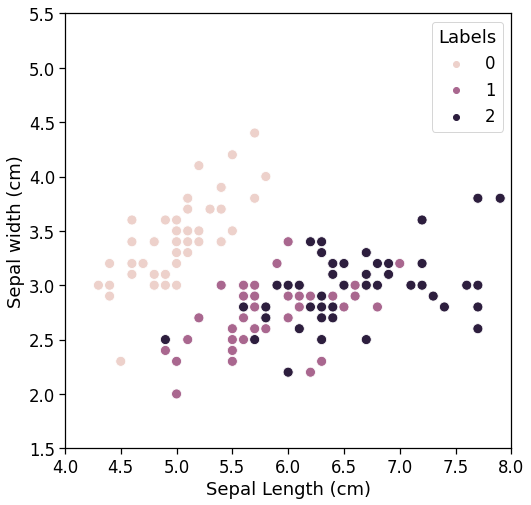

In [ ]:
plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5)
sns.scatterplot(x="Sepal length",
                y="Sepal width",
                s=100,
                hue="Labels",
                data=iris_df)
plt.xlim(4, 8)
plt.ylim(1.5, 5.5)
plt.xlabel("Sepal Length (cm)", size=18)
plt.ylabel("Sepal width (cm)", size=18)

# sklearn

In [ ]:
# The sklearn.datasets module includes utilities to load datasets, including methods to load and fetch popular reference datasets.
from sklearn import datasets
iris = datasets.load_iris() # a 150x4 numpy.ndarray
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

# Torch

## slice tensor

In [ ]:
# The data changes [4, 161, 325] → [4, 161, 324] by removing the first element in the 3rd dimension
import torch

# ver 1
a = torch.randn(4, 161, 325)
b = a[:, :, 1:]
b.shape
# ver 2
a = torch.rand(4,161,325)
b = a[..., 1:]            # or t = t[Ellipsis, 1:] Here, Ellipsis indicate rest of dims
b.shape

# Optuna

1. 多個模型寫在一起的 example [link](https://neptune.ai/blog/optuna-guide-how-to-monitor-hyper-parameter-optimization-runs)
2. 簡單的explanantion [link](https://ithelp.ithome.com.tw/articles/10276835?sc=iThelpR)

DS_HW_6 和 DS_HW_7 都有練習

# TensorBoard

在程式中加入這三個指令

1. import SummaryWriter （也可以從 tensorboardX）
2. 設定 writer 和相對應的資料夾位置 （現在這樣設定就會在目前的目錄下面見一個log資料夾）
3. 紀錄數值 (標題, 要記錄的數值, 步數)

執行程式中或後，就可以在 terminal 輸入 `tensorboard --logdir=./log`，./log 是該資料夾路徑。VS code 會直接跳出開啟 browser 的選項，顯示監測圖表。如果沒有，在瀏覽器輸入 http://localhost:6006/。


In [ ]:
# from tensorboardX import SummaryWriter
from torch.utils.tensorboard import SummaryWriter # 1. import SummaryWriter

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('--logdir', default='log')
    args = parser.parse_args()

    writer = SummaryWriter(args.logdir) # 2. 設定 writer 和相對應的資料夾位置

    train(..., writer)

def train(..., writer):
    # training structure
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data
      inputs, labels = Variable(inputs), Variable(labels)

      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # 每10个batch画个点用于loss曲线
      if i % 10 == 0:
        niter = epoch * len(trainloader) + i
        writer.add_scalar('Train/Loss', loss.data[0], niter) # 3. 紀錄數值 (標題, 要記錄的數值, 步數)